<a href="https://colab.research.google.com/github/christiantommasi/MeuPortf-lioEmPythonER/blob/main/Gold_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estatística descritiva:
1. Média e mediana para avaliar o retorno esperado.
2. Desvio padrão para avaliar o risco do ativo.
3. Assimetria (Skewness) para avaliar se os retornos estão mais inclinados para alta ou queda.
4. Curtose mede a frequência de eventos extremos (cauda gorda).

Distribuições de probabilidade:
1. Normal para avaliar aproximação de retornos financeiros
2. Log-normal para modelagem de preços de ativos.
3. Caudas pesadas (Pareto, Cauchy) para avaliar explicação de eventos extremos.
4. Distribuição de retornos para modelar a probabilidade de ganhos e perdas.

Processos estocásticos:
1. Random Walk para avaliar a hipótese de mercado eficiente.
2. Browniano Geométrico serve como base de modelo para Black-Scholes.
3. Processo de Poisson para modelar choques súbitos no mercado.
4. Teorema central do limite para justificar a aproximação normal dos retornos.

Modelos de séries temporais:
1. Médias móveis (SMA, EMA) indicadores de tendência.
2. Modelos ARIMA para predição de preços baseada em padrões passados.
3. GARCH (Generalized Autoregresive Conditional Heteroskedascity) para medir a volatibilidade futura.

Inferência estatística e teste de hipótese:
1. Teste de normalidade (Shapiro Wilk, KS-Test) para verificar se os retornos seguem uma distribuição normal.
2. Teste de independência (Dickey-Fuller, Ljung-Box) para testar se os preços seguem um caminho aleatório.
3. Correlação e regressão para medir a relação entre ativos.

Métodos de precificação e otimização:
1. Modelo Black-Scholes para precificação de opções com base na volatibilidade.
2. Teoria de Portfólio de Markowitz para maximizar o retorno ajustado ao risco usando variância e covariância.
3. Simulação de Monte Carlo para estimar distribuições de preços futuros.

Estatística Bayesiana:
1. Teorema de Bayes para atualizar probabilidades com base em novas informações, útil para prever tendências.
2. Inferência Bayesiana para modelar incertezas e melhorar previsões em mercado dinâmicos.
3. Redes Bayesianas para modelar relações probabilísticas entre variáveis financeiras.

Modelagem de dependência entre variáveis:
1. Covariância e correlação para medir a relação entre ativos (Ex: Ouro e dólar).
2. Correlação de Spearman e Kendall melhor para relações não-lineares.
3. Copulas Estatísticas para modelar dependências complexas entre variáveis financeiras.

Distribuição estatística avançada:
1. Distribuição de Pareto para modelar eventos extremos (crashes de mercado).
2. Distribuição de Lévy para explicar retornos financeiros com caudas pesadas.
3. Distribuição de Poisson para modelar frequência de eventos raros (ex: quedas bruscas).

Teoria das filas e processos de chegada:
1. Processo de Poisson não homogêneo para modelar eventos de chegadas irregulares, como ordens no mercado.
2. Cadeis de Markov para previsão de estados futuros no mercado com base no estado atual.

Estatística robusta e detecção de anomalias:
1. Média ponderada e média robusta para reduzir impacto de outliers.
2. Testes de Outliers (Z-score, IQR) para indentificar preços extremos.
3. Hodrick-Prescott Filter para separar as tendências de curto e longo prazo.

Teoria do Caos e Fractais:
1. Dimensão fractal de Hust para medir a previsibilidade de séries temporais.
2. Efeito borboleta para medir quanto pequenas variações podem causar grandes impactos.

Importação das bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

Importação do arquivo excel

In [ ]:
df = pd.read_excel('gold_Retorno.xlsx')

df.tail()

,Date,Last,Open,High,Low,Change,Retorno
1313,2025-02-10,2910.06,2892.22,2910.22,2891.19,0.61,0.006091
1314,2025-02-11,2898.34,2907.47,2943.25,2881.75,-0.31,-0.004036
1315,2025-02-12,2903.66,2898.90,2909.16,2864.01,0.18,0.001834
1316,2025-02-13,2929.03,2904.10,2929.74,2900.20,0.87,0.008699
1317,2025-02-14,2883.18,2929.19,2940.23,2876.96,-1.57,-0.015777


Convertendo a coluna Date para datetime

In [ ]:
#Convertendo a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'])

#Verificando o tipo da coluna Date
df.dtypes

Verificando valores NAs

In [ ]:
df.isna().sum()

Verificando as informações estatísticas

In [ ]:
df.describe()

,Date,Last,Open,High,Low,Change,Retorno
count,1318,1318.000000,1318.00000,1318.000000,1318.000000,1318.000000,1318.000000
mean,2022-07-25 13:59:05.371775488,1963.958619,1963.99437,1978.111791,1949.528422,0.051457,0.000462
min,2020-01-07 00:00:00,1477.900000,1471.60000,1502.800000,1450.900000,-4.990000,-0.051140
25%,2021-04-16 18:00:00,1782.925000,1784.40000,1795.900000,1772.575000,-0.440000,-0.004406
50%,2022-07-25 12:00:00,1877.250000,1878.20000,1892.350000,1865.250000,0.060000,0.000574
75%,2023-11-01 18:00:00,2006.275000,2008.00000,2024.875000,1993.225000,0.610000,0.006106
max,2025-02-14 00:00:00,2929.030000,2929.19000,2943.250000,2900.200000,5.950000,0.057754
std,NaN,293.681636,292.84302,294.716280,291.829646,1.015083,0.010162


Criando um gráfico de linha para visualização dos dados da coluna Last ao longo do tempo

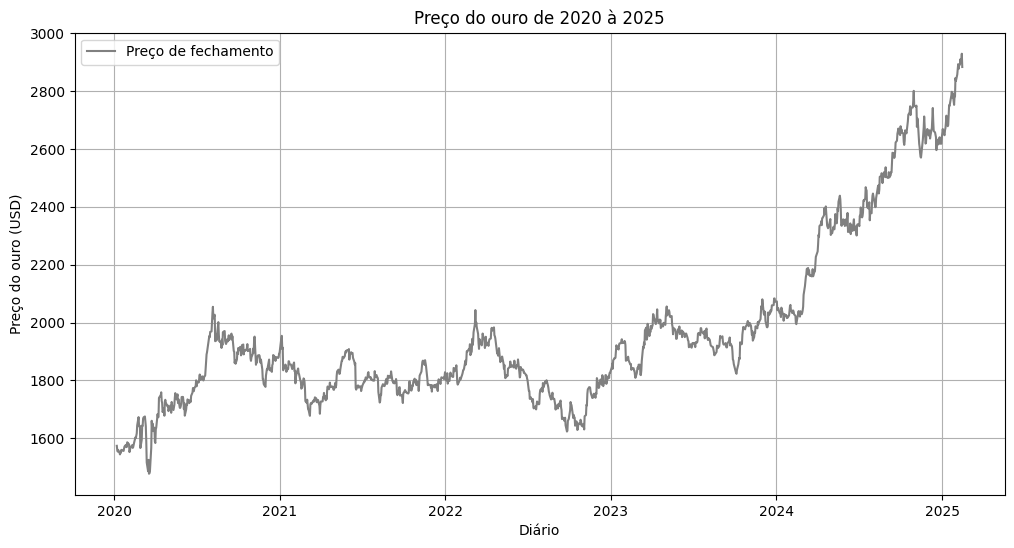

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Last'], label='Preço de fechamento', color='gray')
plt.xlabel('Diário')
plt.ylabel('Preço do ouro (USD)')
plt.title('Preço do ouro de 2020 à 2025')
plt.legend()
plt.grid(True)
plt.show()

Criando um gráfico boxplot

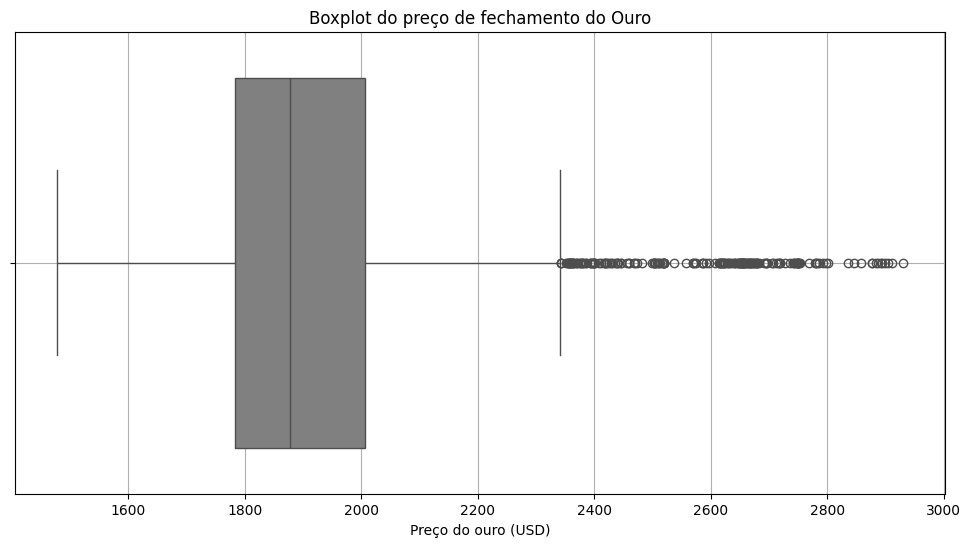

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Last'], color='gray')
plt.xlabel('Preço do ouro (USD)')
plt.title('Boxplot do preço de fechamento do Ouro')
plt.grid(True)
plt.show()

Criando um data frame que armazena os valores dos últimos 60 pregões

In [ ]:
df_60 = df.tail(60)

Usando a biblioteca Skewness para medir retornos, se são positivos ou negativos, de alta ou queda

In [ ]:
#A função Skewness irá analisar dados do data frame df_60 que contém os últimos 60 registros
skewness_last = sts.skew(df_60['Last'])
skewness_open = sts.skew(df_60['Open'])
skewness_change = sts.skew(df_60['Change'])

print(f'A skewness da coluna Last é {skewness_last:.2f}')
print(f'A skewness da coluna Open é {skewness_open:.2f}')
print(f'A skewness da coluna Change é {skewness_change:.2f}')

#A skewness da coluna Last é 0.72
#A skewness da coluna Open é 0.76
#A skewness da coluna Change é -0.93

Plotando um gráfico histplot pra ver a simetria dos dados da coluna Last, Open e Change

Text(0.5, 1.0, 'Distribuição da coluna Open com Skewness: 0.76')

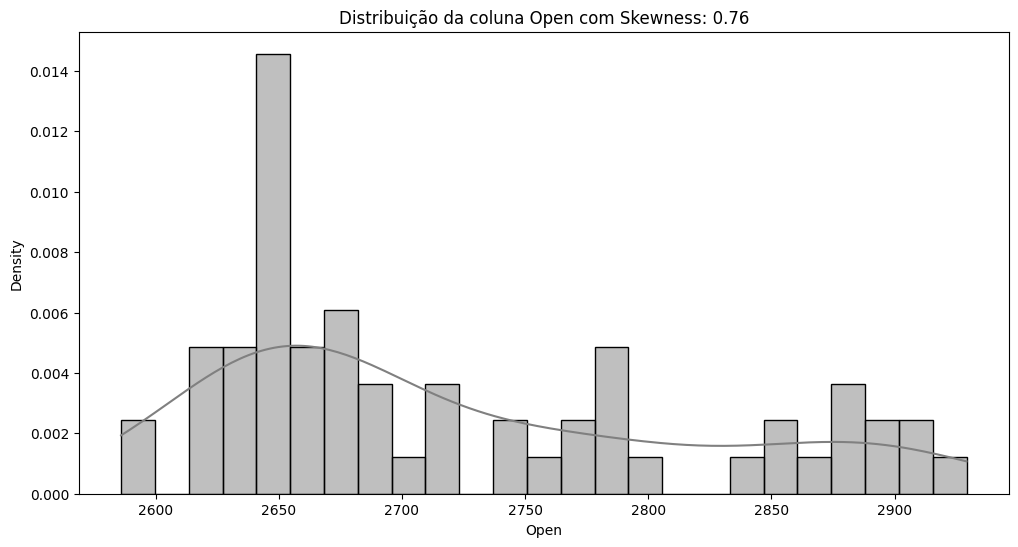

In [ ]:
#Histograma com linha de densidade (KDE) da coluna Open
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(df_60['Open'], kde=True, bins=25, stat='density', color='gray', ax=axes)
axes.set_title(f'Distribuição da coluna Open com Skewness: {skewness_open:.2f}')

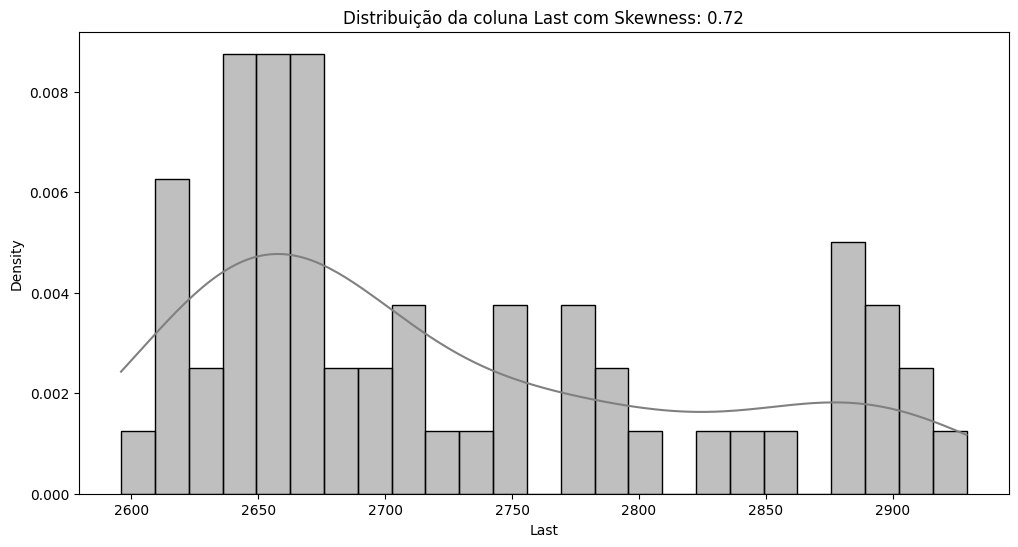

In [ ]:
#Histograma com linha de densidade (KDE) da coluna Last
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(df_60["Last"], kde=True, bins=25, stat="density", color="gray", ax=axes)
axes.set_title(f"Distribuição da coluna Last com Skewness: {skewness_last:.2f}")
plt.show()

Text(0.5, 1.0, 'Distribuição da coluna Change com Skewness: -0.93')

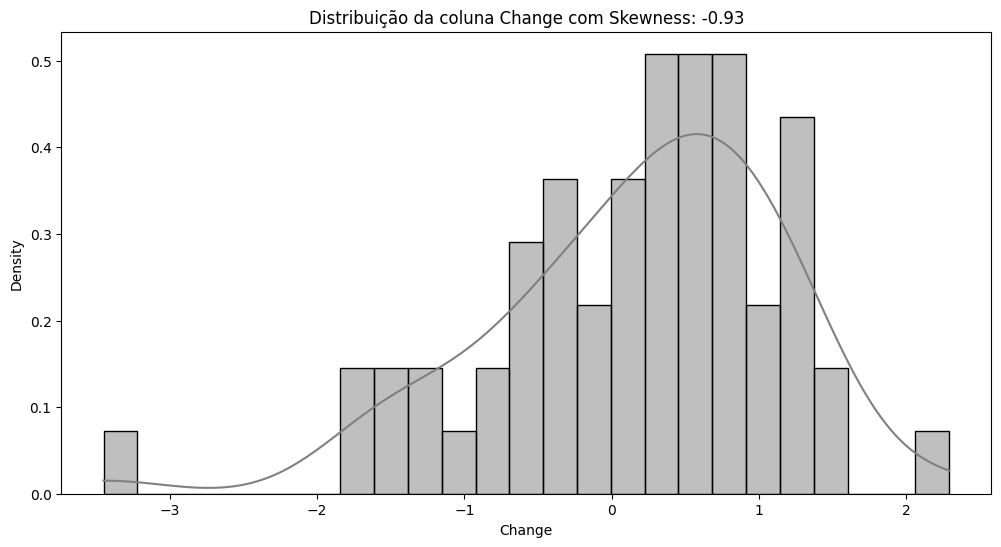

In [ ]:
#Histograma com linha de densidade (KDE) da coluna Change
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(df_60['Change'], kde=True, bins=25, stat='density', color='gray', ax=axes)
axes.set_title(f'Distribuição da coluna Change com Skewness: {skewness_change:.2f}')

Explicação da análise de Skewness:
1. Os Preços de fechamento (Last) e abertura (Open) tem uma leve inclinação para a alta, com um nível de tendência de retornos positivos moderados.
2. Já a coluna Change tem uma leve inclinação negativa, que por sua vez, indica pequenas quedas frequentes ao longo de sua análise dos dias de pregão.

Análise da estatística de Curtose

In [ ]:
#Criando a variável curtose que analisa a coluna Last
curtose_last = sts.kurtosis(df_60['Last'])

#Criando a variável curtose que analisa a coluna Open
curtose_open = sts.kurtosis(df_60['Open'])

#Criando a variável curtose que analisa a coluna Change
curtose_change = sts.kurtosis(df_60['Change'])

print(f'A curtose da coluna Last é {curtose_last:.2f}')
print(f'A curtose da coluna Open é {curtose_open:.2f}')
print(f'A curtose da coluna Change é {curtose_change:.2f}')

#A curtose da coluna Last é -0.88
#A curtose da coluna Open é -0.76
#A curtose da coluna Change é 1.51

A curtose da coluna Last é -0.88
A curtose da coluna Open é -0.76
A curtose da coluna Change é 1.51


Explicação sobre a teoria de Curtose:
1. Coluna Last (-1.05) tem curtose bastante próximas de -1, sugerindo que os preços são relativamente estáveis e não apresentam grandes picos ou quedas inesperadas.
2. Coluna Open (-0.94) tem curtose bastante próximas de -1, sugerindo que os preços são relativamente estáveis e não apresentam grandes picos ou quedas inesperadas.
3. Coluna Change (-0.39) tem uma curtose um pouco mais alta, com uma distribuição mais próxima de uma distribuição normal, mas, com cauda mais leve do que a distribuição normal.

Distribuição de probabilidade: Normal para avaliar aproximação de retornos financeiros

In [ ]:
#Criando a coluna Retornos que armazena os valores do cálculo logarítmo para retorno diário
df_60['Retorno'] = np.log(df_60['Last'] / df_60['Last'].shift(1))

#Removendo o valor NAN (Que o primeiro retorno não teve dados para cálculo, portanto, será NAN)
df_60 = df_60.dropna(subset=['Retorno'])

Plotando um gráfico de histograma para verificar a coluna Retorno

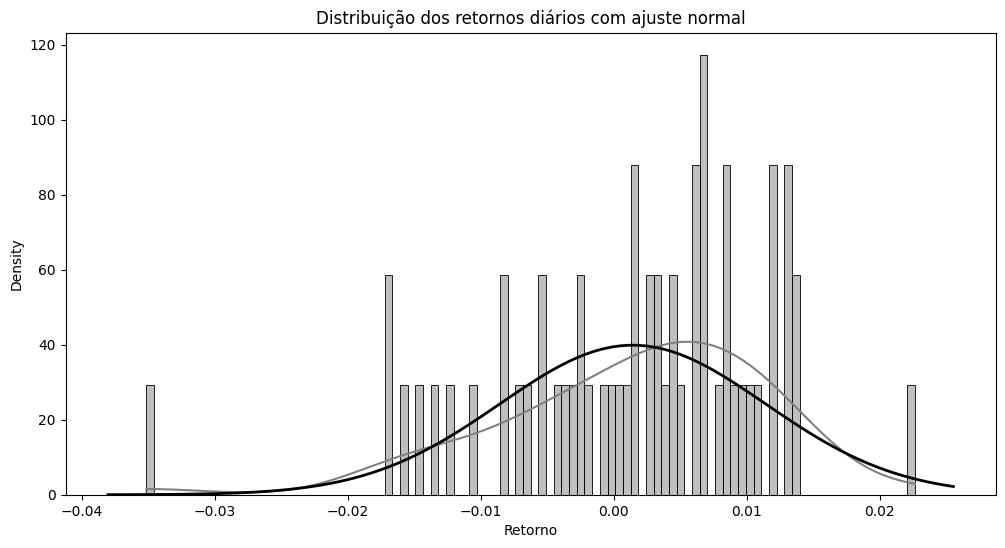

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_60['Retorno'], kde=True, color='gray', stat='density', bins=100)
#Ajustando uma distribuição normal ao dados dos retornos
mu, std = sts.norm.fit(df_60['Retorno'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sts.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Distribuição dos retornos diários com ajuste normal')
plt.show()

Teste de normalidade com Shapiro-Wilk

In [ ]:
#Teste de normalidade (Shapiro-Wilk)
stat, p_value = sts.shapiro(df_60['Retorno'])

print(f"Estatística: {stat:.3f}, p-valor: {p_value:.3f}")

if p_value > 0.05:
    print("Os dados parecem seguir uma distribuição normal.")
else:
    print("Os dados não seguem uma distribuição normal.")

Distribuição de probabilidade: Log-normal para modelagem de preços de ativos.

In [ ]:
#Criando parâmetros da distribuição log-normal à partir dos retornos logarítmicos
mu = df_60['Retorno'].mean()
sigma = df_60['Retorno'].std()
scale = np.exp(mu)

#Exibindo os valores armazenados nas variáveis
print(f'Esse é o print da média {mu:.4f}')
print(f'Esse é o print do desvio padrão {sigma:.4f}')
print(f'Esse é o print da escala {scale:.4f}')

#Esse é o print da média 0.0014
#Esse é o print do desvio padrão 0.0101
#Esse é o print da escala 1.0014

Criando uma distribuição log-normal dos dados apresentados

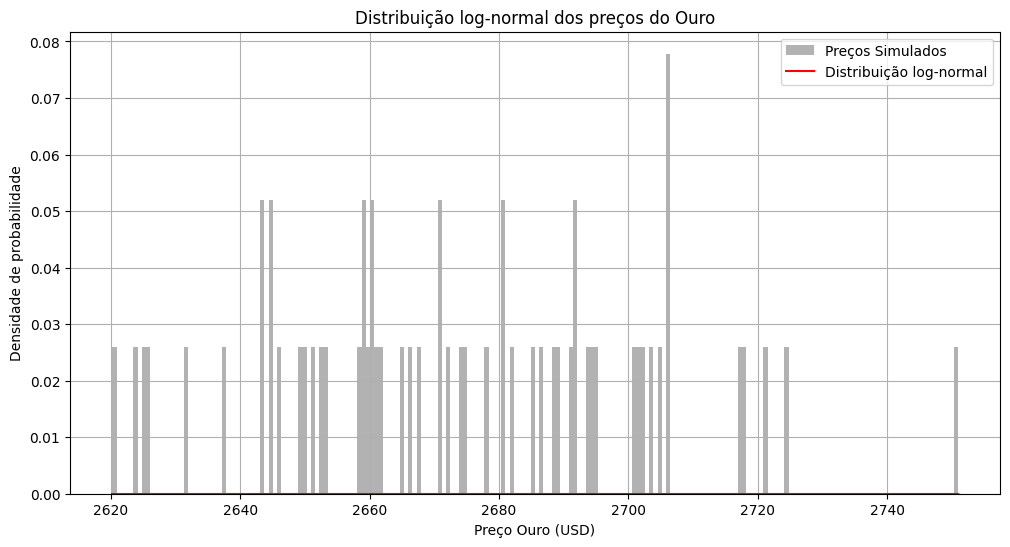

In [ ]:
#Simulando preços com uma distribuição normal
amostras_numeros = len(df_60)
precos_simulados = sts.lognorm.rvs(sigma, scale=scale, size=amostras_numeros) * df_60['Last'].iloc[0]

#Criando o histograma
plt.figure(figsize=(12, 6))
plt.hist(precos_simulados, bins=200, density=True, alpha=0.6, color='gray', label='Preços Simulados')

#Criando a curva teórica da distribuição log-normal
x = np.linspace(min(precos_simulados), max(precos_simulados), 1000)
pdf = sts.lognorm.pdf(x, sigma, scale=scale)
plt.plot(x, pdf, 'r-', label='Distribuição log-normal')

plt.xlabel('Preço Ouro (USD)')
plt.ylabel('Densidade de probabilidade')
plt.title('Distribuição log-normal dos preços do Ouro')
plt.legend()
plt.grid(True)
plt.show()

Caudas pesadas (Pareto, Cauchy) para avaliar explicação de eventos extremos.

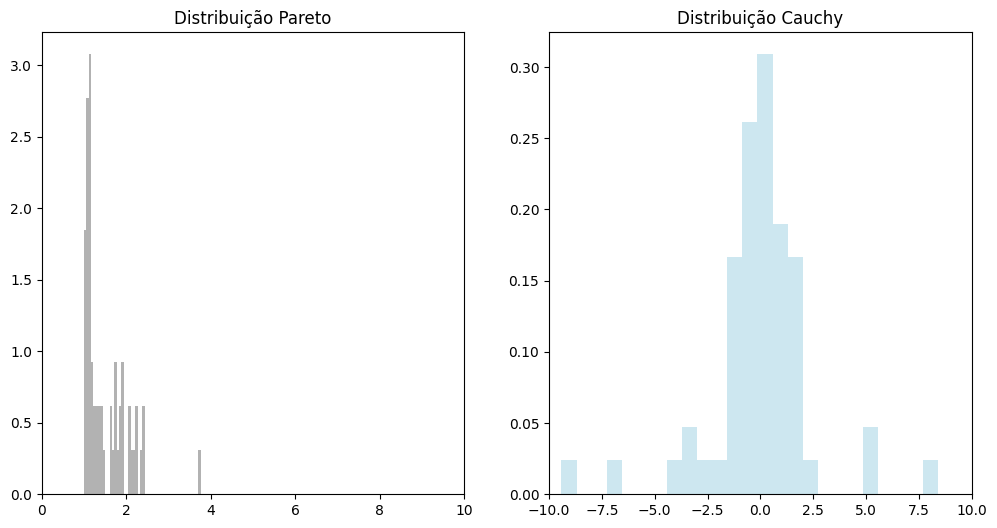

In [ ]:
#Parâmetro de forma para Pareto
alpha = 2.62

#Amostras para o data frame df_60 na coluna Last
pareto_amostra = sts.pareto.rvs(alpha, size=len(df_60['Last']))
cauchy_amostra = sts.cauchy.rvs(size=len(df_60['Last']))

#Plotando o gráfico para visualização agora
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(pareto_amostra, bins=50, density=True, alpha=0.6, color='gray')
plt.title('Distribuição Pareto')
plt.xlim(0, 10)

plt.subplot(1, 2, 2)
plt.hist(cauchy_amostra, bins=50, density=True, alpha=0.6, color='lightblue')
plt.title('Distribuição Cauchy')
plt.xlim(-10, 10)
plt.show()

Explicação:
* Caudas pesadas referem-se à distribuição estatística onde a probabilidade de eventos extremos é maior do que em distribuições normais.
1. Distribuição Pareto: Frequentemente usada para modelar eventos onde uma pequena quantidade de eventos contribui para a maior parte do impacto.
2. Distribuição Cauchy: Caracteriza-se por sua cauda longa e pesada, com média e variância indefinidas, tornando-a útil para modelar fenômenos com grande variabilidade.

* Distribuição Pareto:
1. Eventos significativos: Poucos dias de negociação podem ser responsáveis por grandes variações do preço no ouro.
2. Voltabilidade: Essa distribuição ajuda a identificar os dias de pregão que causam maior impacto.

* Distribuição Cauchy:
1. Alta variabilidade: Reflete as grandes variações de preços que não seguem uma tendência da média.
2. Risco de investimento: Ajuda a entender os riscos do investimento, já que a média e a variância são indefinidas.

Inserindo dados no modelo de previsão de Pareto e Cauchy

In [67]:
#Criando um data frame que armazen os dados históricos de 2020 a 2025 do pregão do Ouro
df_modelo = df

#Ordenando o data frame por data
df_modelo = df_modelo.sort_values('Date')

#Calculando retornos diários (porcentagem)
df_modelo['Retorno'] = df_modelo['Last'].pct_change()

#Removendo valores nulos gerados pela primeira diferença
df_modelo = df_modelo.dropna()

#Normalizando os dados de retorno
df_modelo['Retorno_Norm'] = (df_modelo['Retorno'] - df_modelo['Retorno'].mean()) / df_modelo['Retorno'].std()

#Dividindo os dados em treino e teste
train_size = int(len(df_modelo) * 0.8) #80% para treino
train_data = df_modelo[:train_size]
test_data = df_modelo[train_size:]

#Ajustando as distribuições ao conjunto de treino
alpha = 2.62
pareto_params = sts.pareto.fit(train_data['Retorno_Norm'])
cauchy_params = sts.cauchy.fit(train_data['Retorno_Norm'])

#Previsão do conjunto de teste
pareto_previsao = sts.pareto.rvs(*pareto_params, size=len(test_data))
cauchy_previsao = sts.cauchy.rvs(*cauchy_params, size=len(test_data))

#Denormalizando as previsões para comparar com os valores reais
pareto_previsao_denorm = pareto_previsao * df_modelo['Retorno'].std() + df_modelo['Retorno'].mean()
cauchy_previsao_denorm = cauchy_previsao * df_modelo['Retorno'].std() + df_modelo['Retorno'].mean()

#Criando um data frame para armazenar as previsões
previsao = pd.DataFrame({
    'Date':test_data['Date'].values,
    'Retorno Pareto':pareto_previsao,
    'Retorno Cauchy':cauchy_previsao
})

#Misturando previsao com test_data
test_data = test_data.merge(previsao, on='Date')

#Comparando as previsões com os valores reais
comparacao_df = test_data[['Date', 'Retorno', 'Retorno Pareto', 'Retorno Cauchy']]

Plotando o gráfico para visualização dos dados

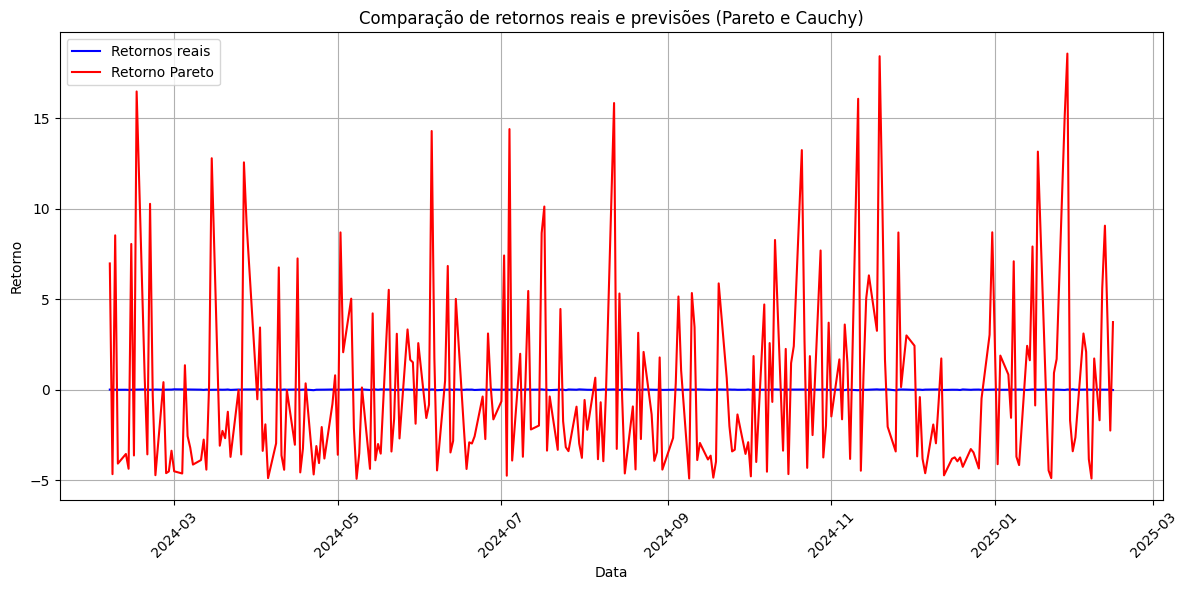

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(comparacao_df['Date'], comparacao_df['Retorno'], label='Retornos reais', linestyle='-', color='blue')
plt.plot(comparacao_df['Date'], comparacao_df['Retorno Pareto'], label='Retorno Pareto', linestyle='-', color='red')
#plt.plot(comparacao_df['Date'], comparacao_df['Retorno Cauchy'], label='Retorno Cauchy', linestyle='-', color='green')
plt.title('Comparação de retornos reais e previsões (Pareto e Cauchy)')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Um teste de previsão de resultados, usando a simulação de Pareto e Cauchy

In [52]:
#Criando um data frame que armazena os dados dos últimos 60 pregões
df_teste_previsao = df_60

#Ordenando o data frame por data
df_teste_previsao = df_teste_previsao.sort_values('Date')

#Calculando retornos diários (porcentagem)
df_teste_previsao['Retorno'] = df_teste_previsao['Last'].pct_change()

#Removendo valores nulos gerados pela primeira diferença
df_teste_previsao = df_teste_previsao.dropna()

#Dividindo os dados em treino e teste
train_size=int(len(df_teste_previsao) * 0.8) #80% para treino
train_data = df_teste_previsao[:train_size]
test_data = df_teste_previsao[train_size:]

#Ajustando as distribuições ao conjunto de treino
alpha = 2.62
pareto_params = sts.pareto.fit(train_data['Retorno'])
cauchy_params = sts.cauchy.fit(train_data['Retorno'])

#Previsão no conjunto de teste
pareto_previsao_1 = sts.pareto.rvs(*pareto_params, size=len(df_teste_previsao))
cauchy_previsao_1 = sts.cauchy.rvs(*cauchy_params, size=len(df_teste_previsao))

#Adicionando as previsões no conjunto de teste
df_teste_previsao['Retorno Pareto'] = pareto_previsao_1
df_teste_previsao['Retorno Cauchy'] = cauchy_previsao_1

#Comparação das previsões com os valores reais
df_previsao = df_teste_previsao[['Date', 'Retorno', 'Retorno Pareto', 'Retorno Cauchy']]

Plotando um gráfico para análise visual dos dados reais e dos dados previstos

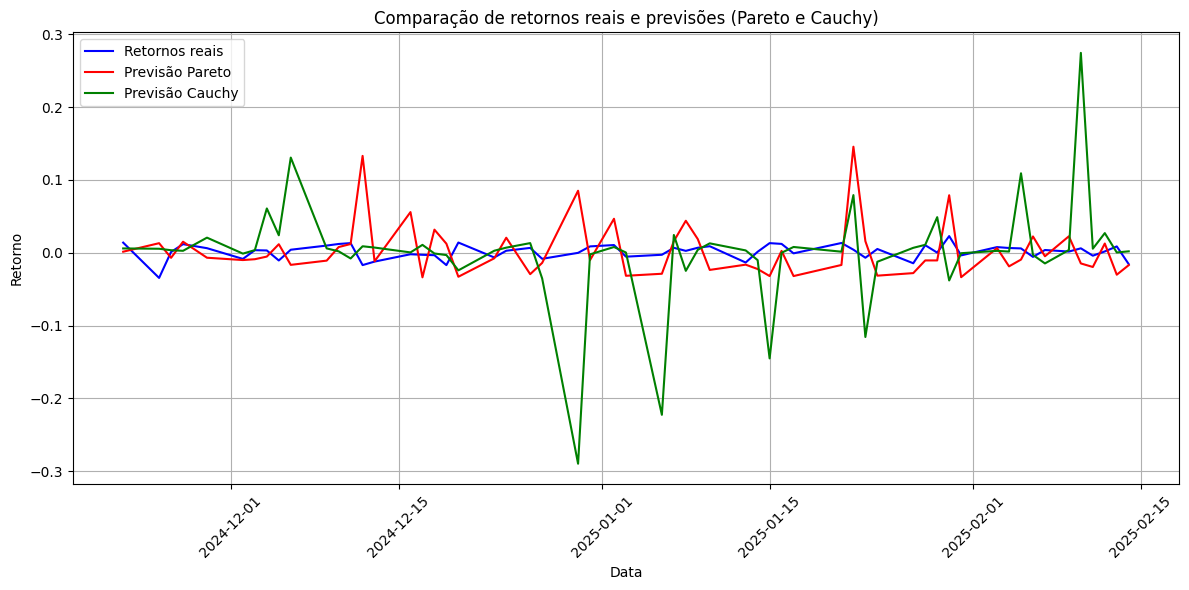

In [44]:
#Comparação dos dados reais com os dados de previsão
df_previsao = df_teste_previsao[['Date', 'Retorno', 'Retorno Pareto', 'Retorno Cauchy']]

#Plotando os retornos reais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(df_previsao['Date'], df_previsao['Retorno'], label='Retornos reais', linestyle='-', color='blue')
plt.plot(df_previsao['Date'], df_previsao['Retorno Pareto'], label='Previsão Pareto', linestyle='-', color='red')
plt.plot(df_previsao['Date'], df_previsao['Retorno Cauchy'], label='Previsão Cauchy', linestyle='-', color='green')
plt.title('Comparação de retornos reais e previsões (Pareto e Cauchy)')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()